In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import numpy as np

sns.set(style="darkgrid", font_scale=1.0)

# path_list = ["./logs_csv/DQN/2x2_10x/", "./logs_csv/DQN/3x3_10x/", "./logs_csv/DQN/4x4_10x/"]
# path_list = ["./logs_csv/A2C/8env/2x2_10x/", "./logs_csv/A2C/8env/3x3_10x/", "./logs_csv/A2C/8env/4x4_10x/"]
# path_list = ["./logs_csv/PPO/8env/2x2_10x/",  "./logs_csv/PPO/8env/3x3_10x/", "./logs_csv/PPO/8env/4x4_10x/"]
path_list = ["./logs_csv/DQN/2x2_10x/",  "./logs_csv/A2C/8env/2x2_10x_800k/", "./logs_csv/PPO/8env/2x2_10x_800k/"]

# path_list = ["./logs_csv/DQN/2x2_5x/",  "./logs_csv/DQN/2x2_10x/", "./logs_csv/DQN/2x2_15x/"]
# path_list = ["./logs_csv/A2C/8env/2x2_5x/",  "./logs_csv/A2C/8env/2x2_10x/", "./logs_csv/A2C/8env/2x2_15x/"]
# path_list = ["./logs_csv/PPO/8env/2x2_5x/",  "./logs_csv/PPO/8env/2x2_10x/", "./logs_csv/PPO/8env/2x2_15x/"]


def get_plot_info(path):
    
    df = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")), axis=1)
    df = df.dropna()

    for i in range(len(df["Wall time"].columns)):
        df['Training Time ' + str(i)] = df['Wall time'].iloc[:,i].apply(lambda x: (x - df['Wall time'].iloc[:,i].min())/60)
        df.rename(columns={"Training Time " + str(i): "Training Time"}, inplace=True)

    df_mean=df.groupby(level=0,axis=1).mean()
    df_std=df.groupby(level=0,axis=1).std(numeric_only=True)["Value"]
    df_count = df.groupby(level=0,axis=1).count()["Value"]

    df_ci_upper = df_mean["Value"] + 1.96*df_std/np.sqrt(df_count)
    df_ci_lower = df_mean["Value"] - 1.96*df_std/np.sqrt(df_count)

    return df_mean, df_std, df_ci_upper, df_ci_lower


         Step  Training Time      Value     Wall time
0       400.0       0.000000 -81.595599  1.680644e+09
1       800.0       0.067442 -81.254594  1.680644e+09
2      1200.0       0.134518 -80.712152  1.680644e+09
3      1600.0       0.201654 -80.676216  1.680644e+09
4      2000.0       0.268981 -80.977597  1.680644e+09
..        ...            ...        ...           ...
495  198400.0      36.921023 -18.639962  1.680646e+09
496  198800.0      36.991750 -18.586200  1.680646e+09
497  199200.0      37.062590 -18.319586  1.680646e+09
498  199600.0      37.133661 -18.073764  1.680646e+09
499  200000.0      37.204533 -17.994234  1.680646e+09

[500 rows x 4 columns]
         Step  Training Time      Value     Wall time
0      4000.0       0.000000 -81.023949  1.684600e+09
1      8000.0       0.192900 -80.798930  1.684600e+09
2     12000.0       0.387993 -80.682380  1.684600e+09
3     16000.0       0.583666 -80.226870  1.684600e+09
4     20000.0       1.032378 -79.609962  1.684600e+09
..  

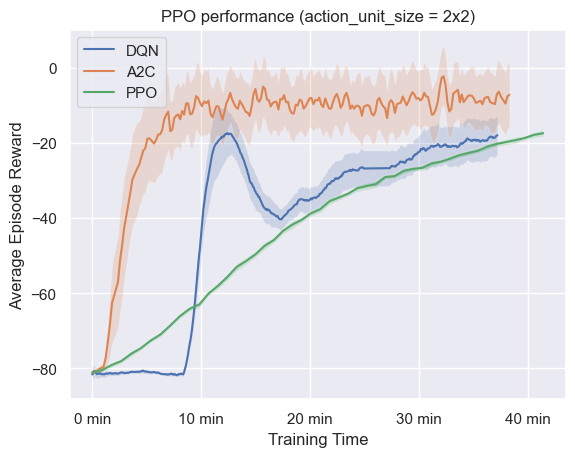

In [33]:
x_variable = "Training Time"

for path in path_list:

    df_mean, df_std, df_ci_upper, df_ci_lower = get_plot_info(path)

    print(df_mean)



    # sns.lineplot(data=df3, x="Step", y="Value", errorbar=('ci', 95))
    # sns.lineplot(data=df_mean, x=x_variable, y="Value", legend='brief', label=path[-8:-5])
    # sns.lineplot(data=df_mean, x=x_variable, y="Value", legend='brief', label=path[24:-1])
    sns.lineplot(data=df_mean, x=x_variable, y="Value", legend='brief', label=path[11:14])

    # Standard deviation
    # plt.fill_between(df_mean["Step"], np.array(df_mean["Value"])-np.array(df_std), np.array(df_mean["Value"])+np.array(df_std), alpha=0.2, color='red')
    # plt.fill_between(df_mean[x_variable], np.array(df_ci_lower), np.array(df_ci_upper), alpha=0.1, color='blue')
    plt.fill_between(df_mean[x_variable], np.array(df_ci_lower), np.array(df_ci_upper), alpha=0.2)

# add title and axis labels
plt.title('PPO performance (action_unit_size = 2x2)')
plt.xlabel(x_variable)
plt.ylabel('Average Episode Reward')

if x_variable == "Step":
    # Set the formatter for the x-axis
    ax = plt.gca()  # Get the current axes
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x * 1e-3:.0f}k'))
elif x_variable == "Training Time":
    # Set the formatter for the x-axis
    ax = plt.gca()  # Get the current axes
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)} min'))

# show the plot
plt.savefig("./results/2x2_10x_equal_training_time", dpi=300)
plt.show()
